In [1]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [2]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [3]:
sept_perc = sept_ts()
june_perc = june_ts()

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [4]:
sept_days = split_by_day(sept_perc)
colnames(sept_days) = c(1:28)

In [5]:
june_days = split_by_day(june_perc)
colnames(june_days) = c(102:129)

In [6]:
combined = cbind(june_days, sept_days)

In [7]:
normed_combined = data.frame(apply(combined, 2, normalize))

In [8]:
colnames(normed_combined) =c(c(1:28), c(102:129))

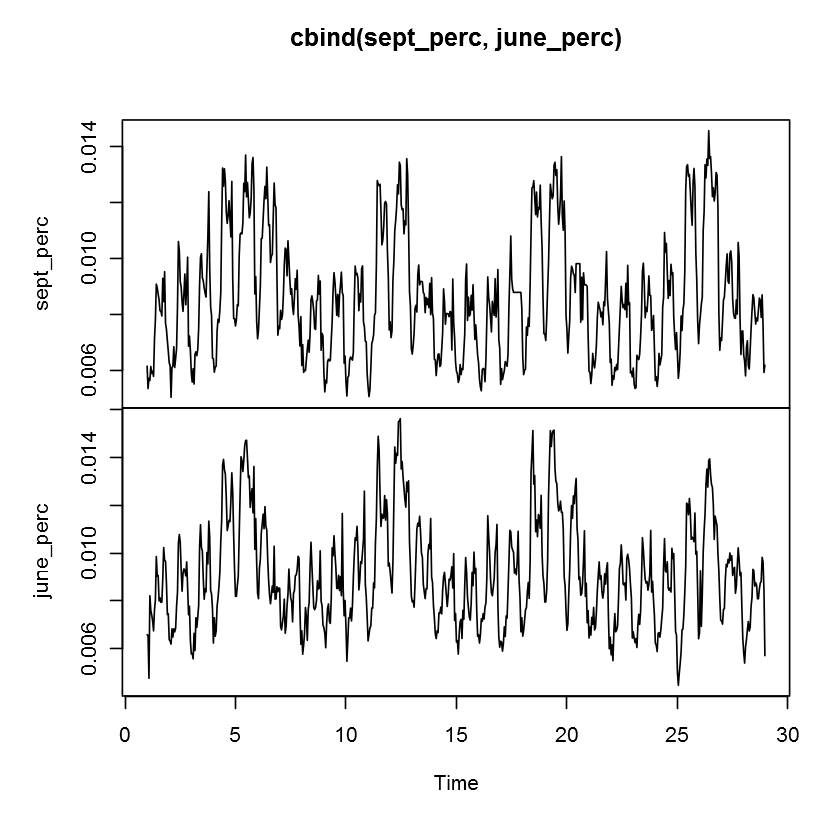

In [9]:
plot.ts(cbind(sept_perc, june_perc))

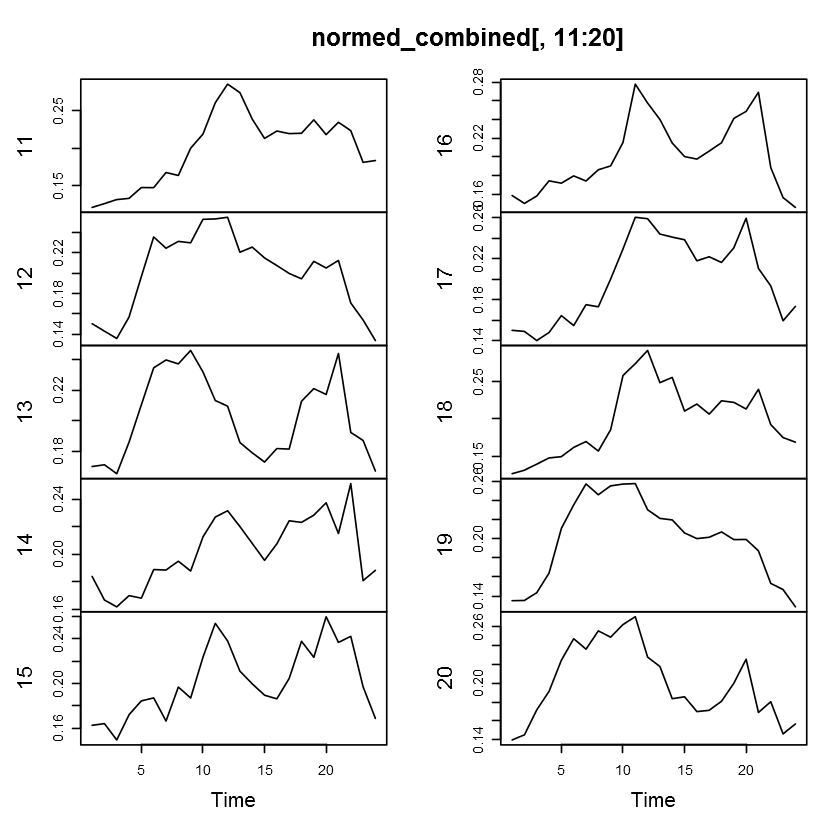

In [10]:
plot.ts(normed_combined[,11:20])

In [11]:
phase_diss = dissimilarity(as.matrix(combined), phase_dist(1))

In [12]:
days = paste(rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8), c(paste(rep('J', 28), 2:29, sep=''), paste(rep('S', 28), 1:28,sep='')),sep='')

In [13]:
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8)

In [14]:
days

[1] "TuJ2"  "WJ3"   "ThJ4"  "FJ5"   "SaJ6"  "SuJ7"  "MJ8"   "TuJ9"  "WJ10" 
[10] "ThJ11" "FJ12"  "SaJ13" "SuJ14" "MJ15"  "TuJ16" "WJ17"  "ThJ18" "FJ19" 
[19] "SaJ20" "SuJ21" "MJ22"  "TuJ23" "WJ24"  "ThJ25" "FJ26"  "SaJ27" "SuJ28"
[28] "MJ29"  "TuS1"  "WS2"   "ThS3"  "FS4"   "SaS5"  "SuS6"  "MS7"   "TuS8" 
[37] "WS9"   "ThS10" "FS11"  "SaS12" "SuS13" "MS14"  "TuS15" "WS16"  "ThS17"
[46] "FS18"  "SaS19" "SuS20" "MS21"  "TuS22" "WS23"  "ThS24" "FS25"  "SaS26"
[55] "SuS27" "MS28"

Phase shift dissimilarity. Saturdays and Sundays have different phase.

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 2  1  1  1  1  1  1  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1 
 F Sa Su  M 
 1  2  2  1 


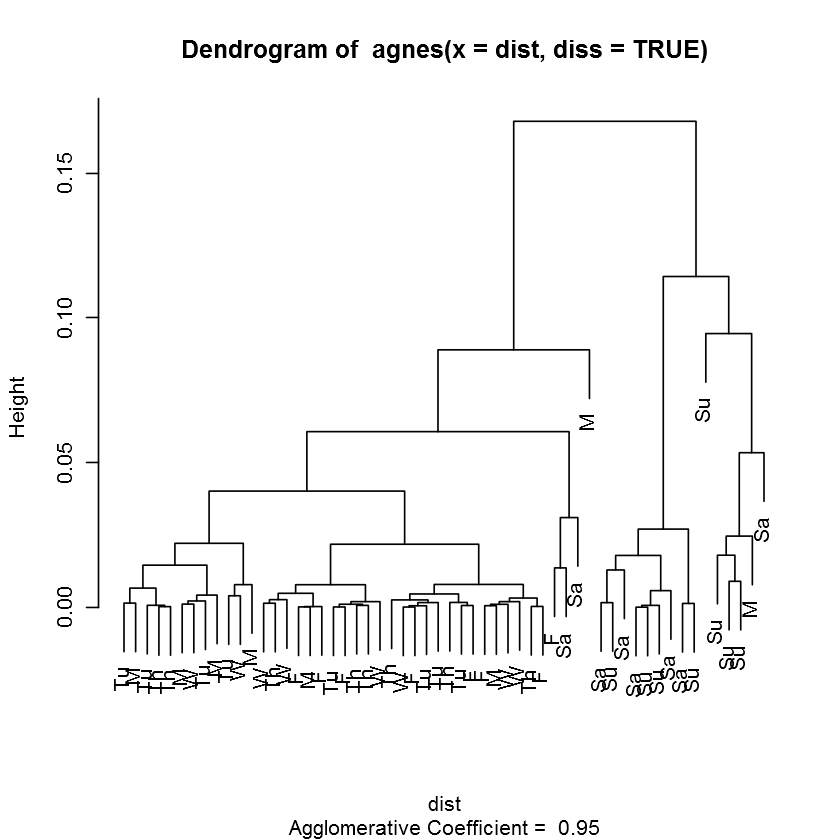

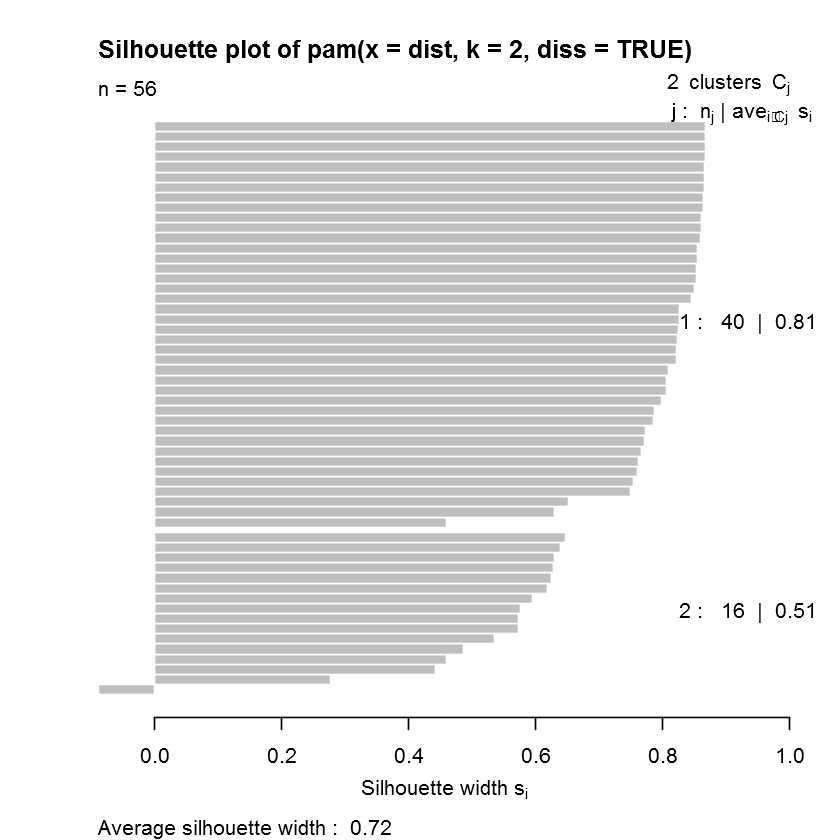

In [53]:
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
clust(dist)

In [51]:
phase_clust_plot <- function(){
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase-clust.png')

png 
  2

In [16]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [131]:
weeks = data.frame(june.1, june.2, june.3, june.4, sept.1, sept.2, sept.3, sept.4)

In [18]:
dpm = dissimilarity(as.matrix(weeks), daily_phase_dist(8))
rownames(dpm) = colnames(weeks)
colnames(dpm) = colnames(weeks)

ERROR: Error: could not find function "daily_phase_dist"


Draw shaded region: http://earlh.com/blog/2009/08/11/shading-pieces-of-an-r-plot/

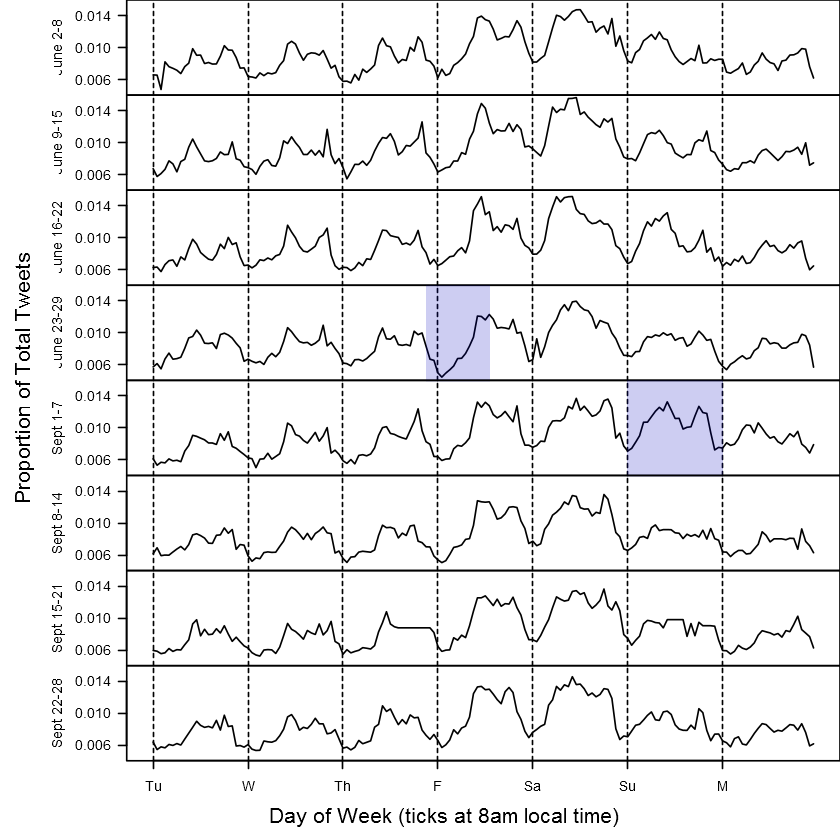

In [154]:
plot_weeks <- function(){
    week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
par(mfrow=c(8,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:8){
    # remove space for x-axis
    par(mar = c(0, 5, 0, 0))
    yrange = c(0.0045, 0.0155)
    plot(weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(ylab=week_names[col], line=4)
    axis(2, labels = c('0.006', '0.010', '0.014'), at=c(0.006, 0.01, 0.014), las = 1)
    abline(v=seq(1, 168, by=24), lty=2)
    if (col==4){
        rect(xleft=70, xright=86, ybottom=(yrange[1]-0.005), ytop=(yrange[2]+0.005),col=shade_color, border=NA)
        }
    if (col==5){
        rect(xleft=(24*5+1), xright=(24*6+1), ybottom=(yrange[1]-0.005), ytop=(yrange[2]+0.005),col=shade_color, border=NA)
        }

}

mtext('Proportion of Total Tweets', side = 2, outer = TRUE, line = 1)
mtext('Day of Week (ticks at 8am local time)', side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()

In [155]:
save_png(plot_weeks, 'c:/users/tom work/pycharmprojects/twipsy-lite/plots/tweets-by-week.png')

png 
  2

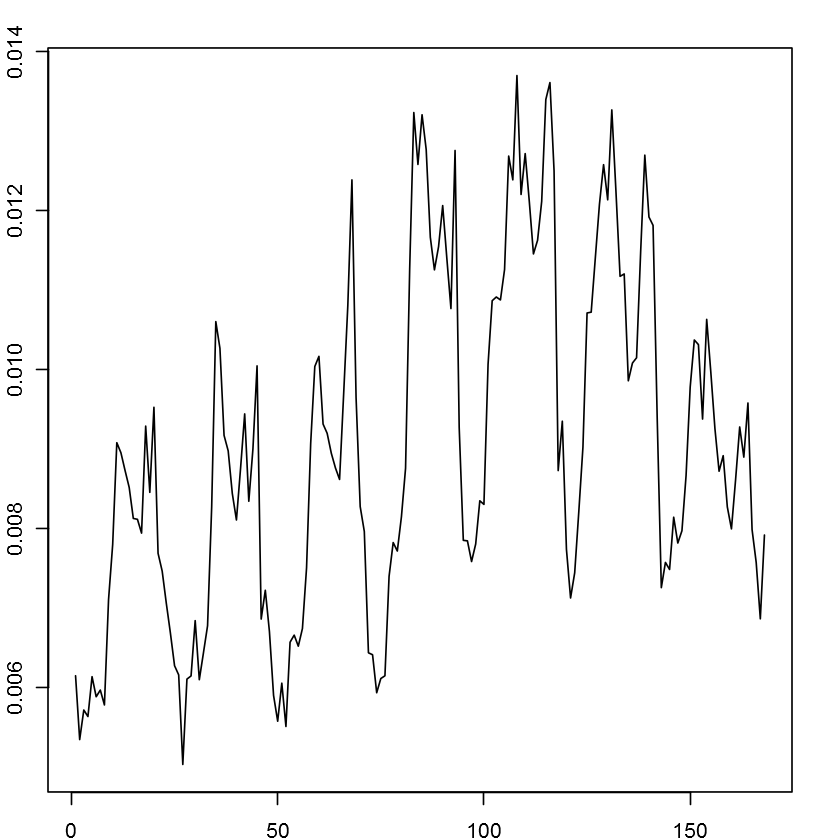

In [28]:
par(mar = rep(2, 4))
plot.ts(weeks[, 1])

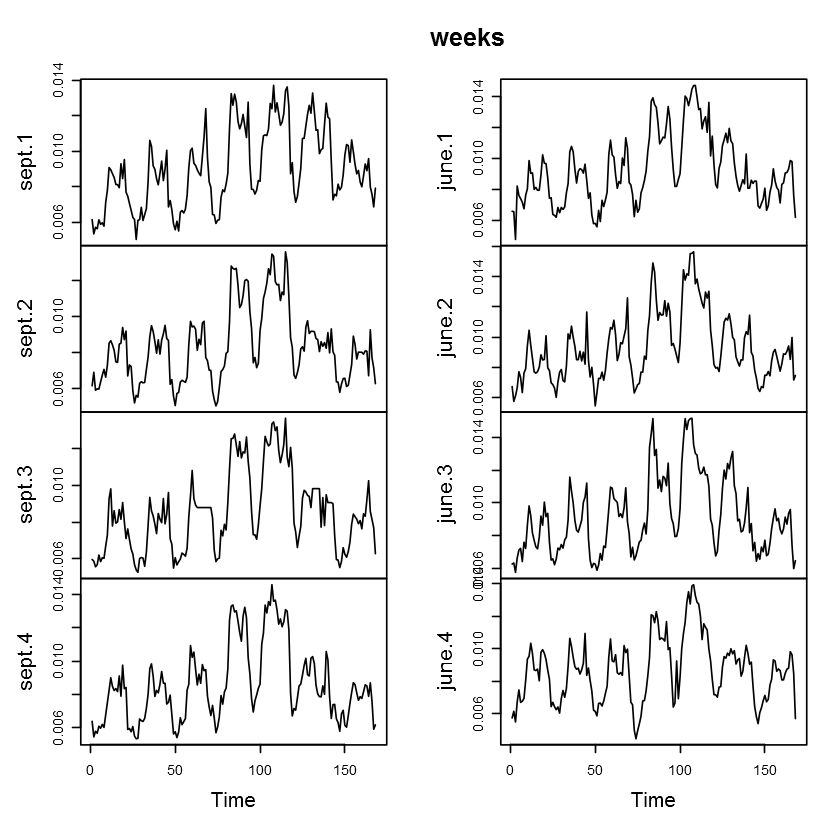

In [53]:
plot.ts(weeks)

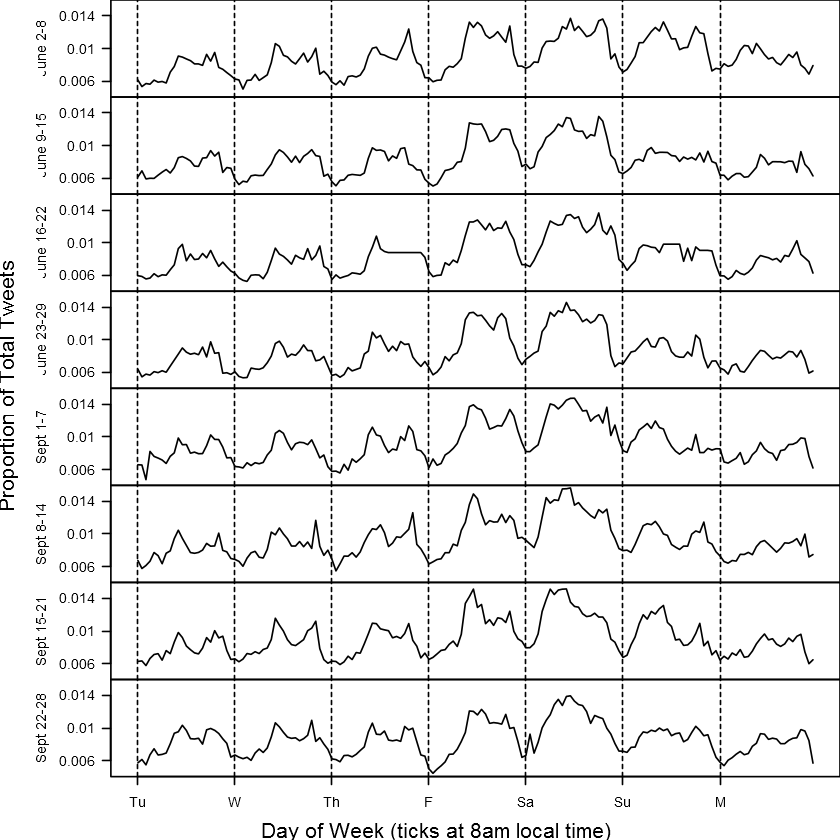

In [118]:
week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
par(mfrow=c(8,1))
# outer margin
par(oma = c(4, 2, 0, 0))
for (col in 1:8){
    # remove space for x-axis
    par(mar = c(0, 5, 0, 0))
    plot(weeks[, col], type='l', xaxt='n', ylim=c(0.0045, 0.0155), yaxt='n', ylab='')
    title(ylab=week_names[col], line=4)
    axis(2, labels = c('0.006', '0.01', '0.014'), at=c(0.006, 0.01, 0.014), las = 1)
    abline(v=seq(1, 168, by=24), lty=2)
}

mtext('Proportion of Total Tweets', side = 2, outer = TRUE, line = 1)
mtext('Day of Week (ticks at 8am local time)', side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)


We look at Euc dist between days, basically comparing shape and magnitude. The dendogram is interesting, prob need more than 2 clusters, need to use silhouette.

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  1  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


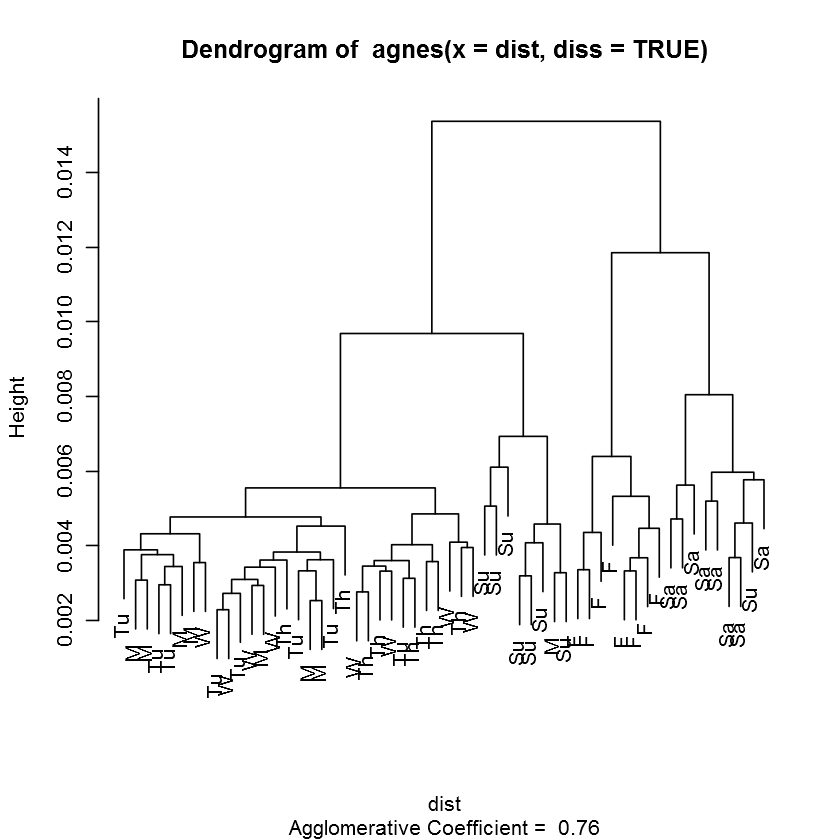

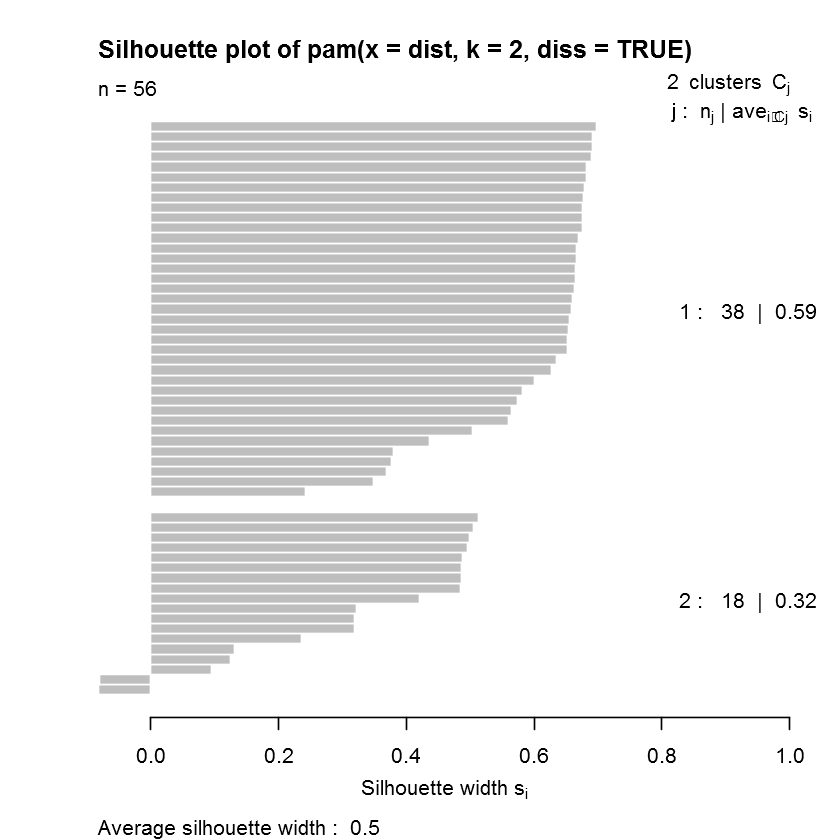

In [68]:
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
clust(dist)

In [71]:
phase_clust_plot <- function(){
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
# clust(dist)
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-day-clust.png')

png 
  2

Dynamic time warping. Seperates out Sunday/Monday/Tuesday

In [65]:
cur_sup <- function(ts){
    return (filter(ts, sides=2, rep(1,5)/5)[3:(length(ts)-2)])
}

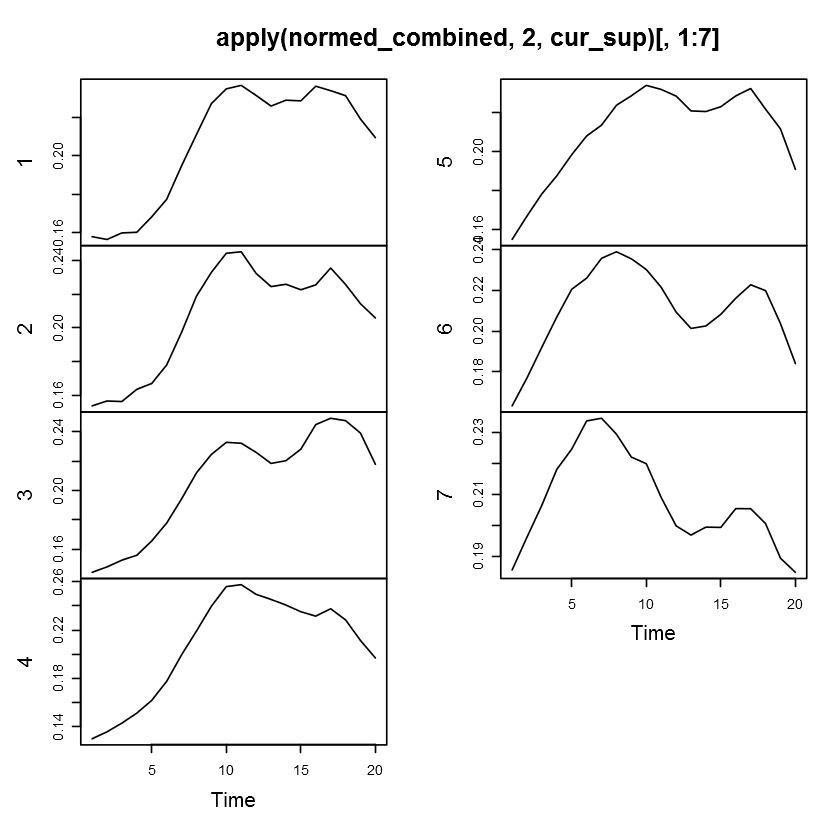

In [69]:
plot.ts(apply(normed_combined, 2, cur_sup)[,1:7])

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


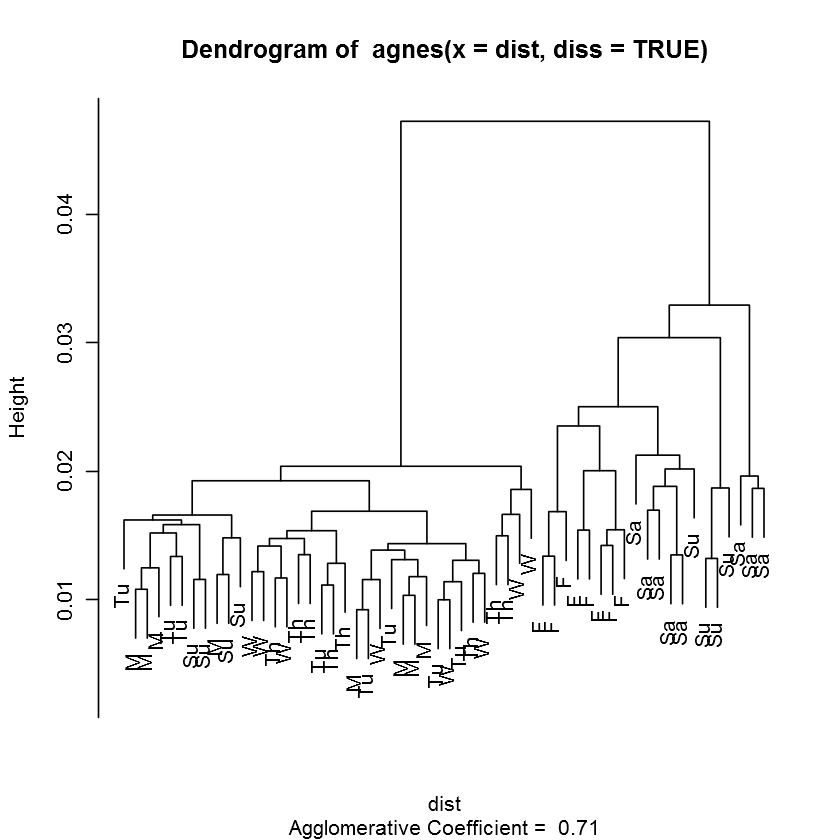

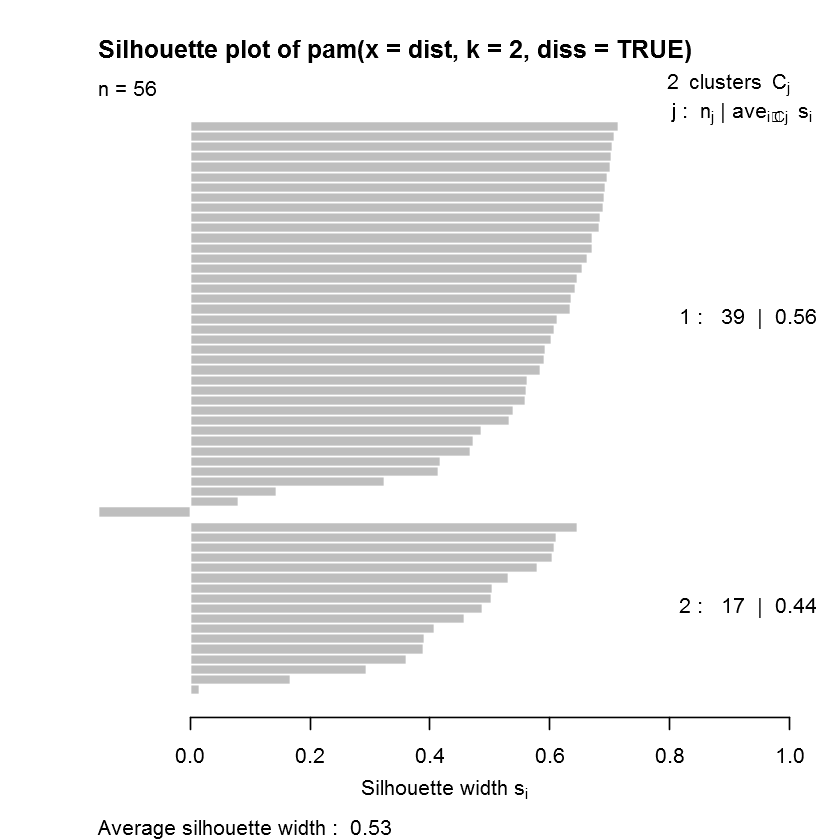

In [69]:
dist = diss(combined, METHOD='DTW')
clust(dist)